**Probelm statement:  What are predicted releases of nitrogen oxides and carbon monoxide from the oil and gas extraction sector (NAICS code 211110) in 2023 if the price of oil goes up or down? a. Crude Oil pricing NRCan b. Crude oil prices Stats Can**


#**LOADING LIBRARIES AND DATASET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('NPRI_2000-2022.csv', encoding='ISO-8859-1')

<ipython-input-2-bf0c3ca196be>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NPRI_2000-2022.csv', encoding='ISO-8859-1')


#**UNDERSTANDING THE DATA**

In [3]:
df.head()

,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Reporting_Year / Année,NPRI_ID / No_INRP,NAICS / Code_SCIAN,Latitude,Longitude,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
count,737516.000000,737516.000000,737516.000000,733434.000000,733434.000000,125032.000000,30880.000000,29861.000000,9181.000000,513282.000000,80004.000000,910.000000,5668.000000,4470.000000,53188.000000,742.000000,3080.000000,50185.000000
mean,2012.267601,11248.268386,289175.551820,49.644636,-97.375436,61.156824,91.455034,117.236013,1.742604,144.203321,23.462437,0.356315,515.614162,5.090716,79.052084,0.710053,174.901856,0.141082
std,6.400156,9352.868266,94788.542197,5.155658,20.184399,797.572502,1628.905004,856.012131,22.223163,2014.861249,218.305058,2.586239,3181.280880,93.378082,577.693253,5.332891,5342.398935,2.606306
min,2000.000000,1.000000,111120.000000,0.000000,-140.883600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,3775.000000,211113.000000,45.431000,-114.767700,0.051000,0.013000,0.505400,0.000000,0.429000,0.015000,0.000000,0.001000,0.000000,0.060000,0.000000,0.000000,0.001700
50%,2012.000000,7114.000000,312140.000000,49.795100,-104.630100,0.796000,0.490000,3.561900,0.000300,4.037595,0.358000,0.000000,5.000000,0.002000,2.068000,0.000000,0.087900,0.023700
75%,2018.000000,18093.000000,327120.000000,53.508500,-79.540060,7.582000,7.458500,22.000000,0.040000,37.389000,3.953000,0.000000,47.000000,0.030000,20.578400,0.000000,1.398350,0.150000
max,2022.000000,306556.000000,913910.000000,82.498758,0.000000,58433.900000,91138.200000,39992.961050,1554.400000,235907.000000,17883.110000,39.058000,152270.000000,4500.100000,39991.000000,82.400000,259050.000000,582.000000


In [5]:
df.dtypes

,0
Reporting_Year / Année,int64
NPRI_ID / No_INRP,int64
Number of employees,object
Company_Name / Dénomination_sociale_de_l'entreprise,object
Facility_Name / Installation,object
NAICS / Code_SCIAN,int64
NAICS Title / Titre Code_SCIAN,object
PROVINCE,object
City,object
Latitude,float64


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Année                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    736900 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise    737516 non-null  object 
 4   Facility_Name / Installation                           736340 non-null  object 
 5   NAICS / Code_SCIAN                                     737516 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         737516 non-null  object 
 7   PROVINCE                                               737516 non-null  object 
 8   City                              

In [7]:
df.isnull().sum()

,0
Reporting_Year / Année,0
NPRI_ID / No_INRP,0
Number of employees,616
Company_Name / Dénomination_sociale_de_l'entreprise,0
Facility_Name / Installation,1176
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
City,90764
Latitude,4082


In [8]:
# finding the duplicate values, if any in the NPRI dataset.
df.duplicated().sum()

0

## Renaming the columns
For better data consistency, errors were coming due to space in namimg of columns

In [9]:
df.rename(columns={"Reporting_Year / Année": "Year",
                   "NPRI_ID / No_INRP" : "NPRI_ID",
                   "Company_Name / Dénomination_sociale_de_l'entreprise":"Company_Name",
                   "Facility_Name / Installation":"Facility_Name",
                   "CAS_Number / No_CAS":"CAS_Number",
                   "Substance Name (English) / Nom de substance (Anglais)":"Substance_Name",
                   "Units / Unités":"Units",
                   "Estimation_Method / Méthode_destimation":"Estimation_Method",
                   "Release to Air - Stack / Point  ":"Stack_Point"
                   }, inplace=True)

In [10]:
# Calculating the sum of null values in all columns
df.isnull().sum()

,0
Year,0
NPRI_ID,0
Number of employees,616
Company_Name,0
Facility_Name,1176
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
City,90764
Latitude,4082


In [11]:
df.head()

,Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Release to Air - Spills,Stack_Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Extracting the data from NPRI data only for Oil and gas extraction based companies because our problem deals with only these companies.

In [12]:
df_NAICS_211110 = df[df['NAICS / Code_SCIAN'] == 211110]
df_NAICS_211110.head()

,Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Release to Air - Spills,Stack_Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
492696,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Fairview,55.99857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003
492697,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Fairview,55.99857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
492698,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Fairview,55.99857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107
492699,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Fairview,55.99857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004
492700,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Fairview,55.99857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013


## Further extracting the data for two gases in problem,i.e., Nitrogen oxide and carbon monoxide which are emited by these companies.

In [13]:
# Extract rows where 'CAS_Number / No_CAS' is either '630-08-0' or '11104-93-1' that is carbon and nitrogen respectively
df_extracted = df_NAICS_211110[
    df_NAICS_211110['CAS_Number'].isin(['630-08-0', '11104-93-1'])
]

# Display the extracted data
df_extracted.head()

,Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Release to Air - Spills,Stack_Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
492701,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Fairview,55.99857,...,NaN,222.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492703,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Fairview,55.99857,...,NaN,269.580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493169,2017,407,0.0,Tidewater Midstream and Infrastructure Ltd.,Ram River,211110,Oil and gas extraction (except oil sands),AB,Rocky Mountain House,52.14630,...,NaN,202.472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493172,2017,407,0.0,Tidewater Midstream and Infrastructure Ltd.,Ram River,211110,Oil and gas extraction (except oil sands),AB,Rocky Mountain House,52.14630,...,NaN,155.307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493187,2017,409,350.0,Husky Oil Operations Limited,Lloydminster Upgrader,211110,Oil and gas extraction (except oil sands),SK,Lloydminster,53.26311,...,NaN,874.839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Extracting only carbon monoxide first because we are creating different dataframes for both gases.

In [14]:
df_extracted_carbon = df_NAICS_211110[df_NAICS_211110['CAS_Number'] == '630-08-0']
# Display the extracted data
df_extracted_carbon.head()

,Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Release to Air - Spills,Stack_Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
492703,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Fairview,55.99857,...,NaN,269.5800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493172,2017,407,0.0,Tidewater Midstream and Infrastructure Ltd.,Ram River,211110,Oil and gas extraction (except oil sands),AB,Rocky Mountain House,52.14630,...,NaN,155.3070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493190,2017,409,350.0,Husky Oil Operations Limited,Lloydminster Upgrader,211110,Oil and gas extraction (except oil sands),SK,Lloydminster,53.26311,...,NaN,1475.5440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493218,2017,426,15.0,Pengrowth Energy Corporation,Quirk Creek Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Millarville,50.74770,...,NaN,85.5720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493233,2017,428,75.0,Imperial Oil Resources N.W.T. Limited,Norman Wells Central Processing Facility,211110,Oil and gas extraction (except oil sands),NT,Norman Wells,65.28730,...,NaN,31.2891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merging the oil price into carbon monoxide dataframe for each year.

In [15]:
if 'Average amount for oil price' not in df.columns:
  df['Average amount for oil price'] = float('nan')

df['Average amount for oil price'] = df['Year'].eq(df['Average amount for oil price'].shift())

In [16]:
df_extracted_carbon.loc[df_extracted_carbon['Year'] == 2017, 'Average amount for oil price'] = 393.0833

<ipython-input-16-867db326a201>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted_carbon.loc[df_extracted_carbon['Year'] == 2017, 'Average amount for oil price'] = 393.0833


In [17]:
df_extracted_carbon.loc[df_extracted_carbon['Year'] == 2018, 'Average amount for oil price'] = 474.4444

In [18]:
df_extracted_carbon.loc[df_extracted_carbon['Year'] == 2019, 'Average amount for oil price'] = 457.6667

In [19]:
df_extracted_carbon.loc[df_extracted_carbon['Year'] == 2020, 'Average amount for oil price'] = 304.7778

In [20]:
df_extracted_carbon.loc[df_extracted_carbon['Year'] == 2021, 'Average amount for oil price'] = 504.0881

In [21]:
df_extracted_carbon.loc[df_extracted_carbon['Year'] == 2022, 'Average amount for oil price'] = 732.6331

In [22]:
df_extracted_carbon.head()

,Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Stack_Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne),Average amount for oil price
492703,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Fairview,55.99857,...,269.5800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0833
493172,2017,407,0.0,Tidewater Midstream and Infrastructure Ltd.,Ram River,211110,Oil and gas extraction (except oil sands),AB,Rocky Mountain House,52.14630,...,155.3070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0833
493190,2017,409,350.0,Husky Oil Operations Limited,Lloydminster Upgrader,211110,Oil and gas extraction (except oil sands),SK,Lloydminster,53.26311,...,1475.5440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0833
493218,2017,426,15.0,Pengrowth Energy Corporation,Quirk Creek Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Millarville,50.74770,...,85.5720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0833
493233,2017,428,75.0,Imperial Oil Resources N.W.T. Limited,Norman Wells Central Processing Facility,211110,Oil and gas extraction (except oil sands),NT,Norman Wells,65.28730,...,31.2891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0833


## Dropping the unnecessary columns as these columns contain very sparse data which is not useful for our problem, as we were unable to get sufficient data from these columns for our problem.

In [23]:
df_extracted_carbon.drop(
    [

        'Release to Air - Fugitive',
        'Release to Air - Other Non-Point ',
        'Release to Air - Storage / Handling ',
        'Release to Air - Spills ',
        'Releases to Water Bodies - Direct Discharges ',
        'Releases to Land - Leaks',
        'Release to Air - Road dust  ',
        'Releases to Land - Other ',
        'Releases to Land - Spills ',
        'Releases to Water Bodies - Leaks',
        'Releases to Water Bodies - Spills ',
        'Sum of release to all media (<1tonne)',
        'City'
    ],
    axis=1,
    inplace=True,
)

<ipython-input-23-600c0977a145>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted_carbon.drop(


In [24]:
df_extracted_carbon.head()

,Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,Latitude,Longitude,CAS_Number,Substance_Name,Units,Estimation_Method,Stack_Point,Average amount for oil price
492703,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,55.99857,-118.52980,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,269.5800,393.0833
493172,2017,407,0.0,Tidewater Midstream and Infrastructure Ltd.,Ram River,211110,Oil and gas extraction (except oil sands),AB,52.14630,-115.33000,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,155.3070,393.0833
493190,2017,409,350.0,Husky Oil Operations Limited,Lloydminster Upgrader,211110,Oil and gas extraction (except oil sands),SK,53.26311,-109.94889,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,1475.5440,393.0833
493218,2017,426,15.0,Pengrowth Energy Corporation,Quirk Creek Gas Plant,211110,Oil and gas extraction (except oil sands),AB,50.74770,-114.49470,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,85.5720,393.0833
493233,2017,428,75.0,Imperial Oil Resources N.W.T. Limited,Norman Wells Central Processing Facility,211110,Oil and gas extraction (except oil sands),NT,65.28730,-126.88120,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,31.2891,393.0833


In [25]:
df_extracted_carbon.shape

(13956, 16)

## Calculating the mean number of employees so that we can deal with missing values in this column.

In [26]:
# Convert 'Number of employees' to numeric, replacing non-numeric with NaN
df_extracted_carbon['Number of employees'] = pd.to_numeric(df_extracted_carbon['Number of employees'], errors='coerce')

# Calculate the mean excluding NaN values
mean_employees = int(round(df_extracted_carbon['Number of employees'].mean(skipna=True)))

# Replace NaN values and original 0 values with the mean
df_extracted_carbon['Number of employees'] = df_extracted_carbon['Number of employees'].fillna(mean_employees)
df_extracted_carbon['Number of employees'] = df_extracted_carbon['Number of employees'].replace(0, mean_employees)

# Check if the mean calculation includes original 0 values
print(f"Mean number of employees: {mean_employees}")

Mean number of employees: 4


<ipython-input-26-c8c9f25cdaf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted_carbon['Number of employees'] = pd.to_numeric(df_extracted_carbon['Number of employees'], errors='coerce')
<ipython-input-26-c8c9f25cdaf1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted_carbon['Number of employees'] = df_extracted_carbon['Number of employees'].fillna(mean_employees)
<ipython-input-26-c8c9f25cdaf1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [27]:
df_extracted_carbon.isnull().sum()

,0
Year,0
NPRI_ID,0
Number of employees,0
Company_Name,0
Facility_Name,0
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
Latitude,10
Longitude,10


**cause for reduction in number of rows**

df_extracted_carbon contains all individual records of carbon monoxide releases for companies with NAICS code 211110. Each row represents a single report for a specific company, facility, and year.

pivot_table_complete is created by grouping the data in df_extracted_carbon by 'Company_Name', 'NPRI_ID', and 'Year' and then calculating the sum of 'Release to Air - Stack / Point' for each group. This aggregation process combines multiple rows from df_extracted_carbon into a single row in pivot_table_complete if they have the same 'Company_Name', 'NPRI_ID', and 'Year'. This will naturally reduce the number of rows

In [28]:
# Group by specified columns and sum the 'Release to Air - Stack / Point' column
df_carbon = df_extracted_carbon.groupby(['Year', 'Company_Name', 'NPRI_ID', 'PROVINCE', 'Facility_Name','Number of employees', 'Latitude', 'Longitude', 'CAS_Number', 'Substance_Name', 'Estimation_Method', 'Average amount for oil price', 'Units', 'NAICS / Code_SCIAN', 'NAICS Title / Titre Code_SCIAN'])['Stack_Point'].sum().reset_index()

# Display the resulting DataFrame
df_carbon.head()

,Year,Company_Name,NPRI_ID,PROVINCE,Facility_Name,Number of employees,Latitude,Longitude,CAS_Number,Substance_Name,Estimation_Method,Average amount for oil price,Units,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,Stack_Point
0,2017,AECO Gas Storage Partnership,6619,AB,Suffield Gas Storage Facility,22.0,50.5772,-111.1781,630-08-0,Carbon monoxide,E2 - Published Emission Factors,393.0833,tonnes,211110,Oil and gas extraction (except oil sands),108.721
1,2017,ARC Resources,438,AB,Redwater Sour Gas Plant 01-29,27.0,53.9527,-113.0780,630-08-0,Carbon monoxide,E2 - Published Emission Factors,393.0833,tonnes,211110,Oil and gas extraction (except oil sands),192.855
2,2017,ARC Resources,15131,AB,Ante Creek North Sour Gas Plant 02-26,1.0,54.8972,-117.7088,630-08-0,Carbon monoxide,E2 - Published Emission Factors,393.0833,tonnes,211110,Oil and gas extraction (except oil sands),334.522
3,2017,ARC Resources,15412,AB,Hotchkiss Comp Stn 07-03,1.0,57.2990,-118.2289,630-08-0,Carbon monoxide,E2 - Published Emission Factors,393.0833,tonnes,211110,Oil and gas extraction (except oil sands),105.261
4,2017,ARC Resources,15414,AB,Ante Creek North Oil Battery 07-18,1.0,54.7964,-117.6580,630-08-0,Carbon monoxide,E2 - Published Emission Factors,393.0833,tonnes,211110,Oil and gas extraction (except oil sands),130.268


In [29]:
df_carbon.shape

(13946, 16)

##Feature Engineering: Creating new features Release_t-1, Release_t-2, Release_t-3, these features help to record the previous year values of the same comapny and helps the model to learn properly about that particular compaany.##

In [30]:
# Creating a pivot table for making new features
pivot_table = pd.pivot_table(df_carbon,
                             values='Stack_Point',
                             index=["Company_Name", 'Facility_Name', 'NPRI_ID', 'Year', 'Number of employees', 'Average amount for oil price'],
                             aggfunc='sum')

# Reseting the index to make 'Company_Name', 'NPRI_ID', and 'Year' columns
pivot_table = pivot_table.reset_index()

# Creating lag columns for t-1, t-2, and t-3 within each group of 'Company_Name' and 'Facility_Name'
for i in range(1, 4):
    pivot_table[f'Release_t-{i}'] = pivot_table.groupby(["Company_Name", 'Facility_Name'])['Stack_Point'].shift(i)

pivot_table.head(5)


,Company_Name,Facility_Name,NPRI_ID,Year,Number of employees,Average amount for oil price,Stack_Point,Release_t-1,Release_t-2,Release_t-3
0,ACCEL Energy Canada Ltd.,JCWP 7-6,23628,2020,1.0,304.7778,14.855,NaN,NaN,NaN
1,ACCEL Energy Canada Ltd.,Judy Creek Production Complex,4566,2020,12.0,304.7778,2.664,NaN,NaN,NaN
2,ACCEL Energy Canada Ltd.,South Swan Hills,17445,2020,1.0,304.7778,14.957,NaN,NaN,NaN
3,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2017,22.0,393.0833,108.721,NaN,NaN,NaN
4,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2018,21.0,474.4444,55.686,108.721,NaN,NaN


##Adding feature "Release_2022" which is the recent year relese value for a company and helps the mdoel to know the recent year release amount for that company.##

In [31]:
# Creating a pivot table
pivot_table = pd.pivot_table(df_carbon,
                           values='Stack_Point',
                           index=["Company_Name","Facility_Name", 'NPRI_ID', "Year","Number of employees","Average amount for oil price"],
                           aggfunc='sum')

# Reseting the index to make 'Company_Name', 'NPRI_ID', and 'Year' columns
pivot_table = pivot_table.reset_index()

# Create lag columns for t-1, t-2, and t-3 within each 'Company_Name' and 'Facility_Name'
for i in range(1, 4):
    pivot_table[f'Release_t-{i}'] = pivot_table.groupby(["Company_Name", "Facility_Name"])['Stack_Point'].shift(i)


# Creating a column for release in 2022
pivot_table['Release_2022'] = pivot_table.apply(lambda row: pivot_table[(pivot_table["Company_Name"] == row["Company_Name"]) & (pivot_table["Year"] == 2022)]['Stack_Point'].iloc[0] if (2022 in pivot_table[pivot_table["Company_Name"] == row["Company_Name"]]["Year"].values) else None, axis=1)


pivot_table.head()

,Company_Name,Facility_Name,NPRI_ID,Year,Number of employees,Average amount for oil price,Stack_Point,Release_t-1,Release_t-2,Release_t-3,Release_2022
0,ACCEL Energy Canada Ltd.,JCWP 7-6,23628,2020,1.0,304.7778,14.855,NaN,NaN,NaN,NaN
1,ACCEL Energy Canada Ltd.,Judy Creek Production Complex,4566,2020,12.0,304.7778,2.664,NaN,NaN,NaN,NaN
2,ACCEL Energy Canada Ltd.,South Swan Hills,17445,2020,1.0,304.7778,14.957,NaN,NaN,NaN,NaN
3,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2017,22.0,393.0833,108.721,NaN,NaN,NaN,96.10282
4,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2018,21.0,474.4444,55.686,108.721,NaN,NaN,96.10282


In [32]:
# Sort the pivot_table by 'Year' and reset the index
pivot_table = pivot_table.sort_values(by='Year').reset_index(drop=True)
pivot_table.head()

,Company_Name,Facility_Name,NPRI_ID,Year,Number of employees,Average amount for oil price,Stack_Point,Release_t-1,Release_t-2,Release_t-3,Release_2022
0,EnCana Corporation,Tower Gas Plant 03-07-081-17W6,29803,2017,1.0,393.0833,18.6770,NaN,NaN,NaN,NaN
1,Crescent Point Energy Corp.,Pinto Oil MWB 03-07,28121,2017,1.0,393.0833,26.1940,NaN,NaN,NaN,38.66264
2,Guide Exploration Ltd.,LRE - Westfire Redwater 06-01,28159,2017,1.0,393.0833,29.7897,NaN,NaN,NaN,NaN
3,Canadian Natural Resources Limited,Godin Compressor Station 15-19-081-01W5,22550,2017,1.0,393.0833,35.0000,NaN,NaN,NaN,82.54003
4,Bonavista Energy Corporation,North Rosevear Former Sour GP,24354,2017,1.0,393.0833,24.7390,NaN,NaN,NaN,1.02800


##We are making sure whether the lag is working properly or not by taking example of a company 'AECO Gas Storage Partnership'. First the data is taken from df_extracted_carbon where lags were not created and then the data is taken from pivot_table which displays data after creating lags##

In [33]:
# Display data for 'AECO Gas Storage Partnership'
aeco_data = df_extracted_carbon[df_extracted_carbon['Company_Name'] == 'AECO Gas Storage Partnership']
aeco_data

,Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,Latitude,Longitude,CAS_Number,Substance_Name,Units,Estimation_Method,Stack_Point,Average amount for oil price
506021,2017,6619,22.0,AECO Gas Storage Partnership,Suffield Gas Storage Facility,211110,Oil and gas extraction (except oil sands),AB,50.5772,-111.1781,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,108.72100,393.0833
536411,2018,6619,21.0,AECO Gas Storage Partnership,Suffield Gas Storage Facility,211110,Oil and gas extraction (except oil sands),AB,50.5772,-111.1781,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,55.68600,474.4444
581066,2019,6619,21.0,AECO Gas Storage Partnership,Suffield Gas Storage Facility,211110,Oil and gas extraction (except oil sands),AB,50.5772,-111.1781,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,55.39400,457.6667
624972,2020,6619,21.0,AECO Gas Storage Partnership,Suffield Gas Storage Facility,211110,Oil and gas extraction (except oil sands),AB,50.5772,-111.1781,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,155.45600,304.7778
666450,2021,6619,21.0,AECO Gas Storage Partnership,Suffield Gas Storage Facility,211110,Oil and gas extraction (except oil sands),AB,50.5772,-111.1781,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,71.77500,504.0881
707539,2022,6619,22.0,AECO Gas Storage Partnership,Suffield Gas Storage Facility,211110,Oil and gas extraction (except oil sands),AB,50.5772,-111.1781,630-08-0,Carbon monoxide,tonnes,E2 - Published Emission Factors,96.10282,732.6331


In [34]:
# Filter the pivot_table for "AECO Gas Storage Partnership"
aeco_data = pivot_table[pivot_table["Company_Name"] == "AECO Gas Storage Partnership"]

# Display the filtered data
aeco_data

,Company_Name,Facility_Name,NPRI_ID,Year,Number of employees,Average amount for oil price,Stack_Point,Release_t-1,Release_t-2,Release_t-3,Release_2022
1368,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2017,22.0,393.0833,108.72100,NaN,NaN,NaN,96.10282
3329,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2018,21.0,474.4444,55.68600,108.721,NaN,NaN,96.10282
5709,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2019,21.0,457.6667,55.39400,55.686,108.721,NaN,96.10282
8956,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2020,21.0,304.7778,155.45600,55.394,55.686,108.721,96.10282
9375,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2021,21.0,504.0881,71.77500,155.456,55.394,55.686,96.10282
11462,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2022,22.0,732.6331,96.10282,71.775,155.456,55.394,96.10282


In [35]:
pivot_table.shape

(13885, 11)

In [36]:
# Drop rows with NaN values in the 'Release_2022' column as this is our label column so we are not imputing any values in this
pivot_table.dropna(subset=['Release_2022'], inplace=True)

In [37]:
pivot_table.shape

(11889, 11)

In [38]:
# Drop rows where all three specified columns ('Release_t-1', 'Release_t-2', 'Release_t-3') are NaN, companies with no previous data are of no use so we drooped such
pivot_table.dropna(subset=['Release_t-1', 'Release_t-2', 'Release_t-3'], how='all', inplace=True)

In [39]:
pivot_table.shape

(6792, 11)

In [40]:
# Sorting the values by "Year" so that there is no data leakage
pivot_table_sorted = pivot_table.sort_values(by='Year', ascending=True).reset_index(drop=True)
pivot_table_sorted.head(5)

,Company_Name,Facility_Name,NPRI_ID,Year,Number of employees,Average amount for oil price,Stack_Point,Release_t-1,Release_t-2,Release_t-3,Release_2022
0,Canadian Natural Resources Limited,Tarragon Twinning North Sweet Gas Plant 04-31-...,28332,2017,1.0,393.0833,59.900,43.744,NaN,NaN,82.54003
1,AltaGas Ltd.,Lindbergh Comp Stn 07-21,15147,2018,1.0,474.4444,26.253,27.163,NaN,NaN,181.13879
2,AltaGas Ltd.,John Lake North Comp Stn 11-35,15157,2018,1.0,474.4444,103.688,113.065,NaN,NaN,181.13879
3,AltaGas Ltd.,Blair Creek Comp Stn d-058-F,19953,2018,1.0,474.4444,585.618,584.444,NaN,NaN,181.13879
4,AltaGas Ltd.,Esther Sour Gas Plant 04-14,15110,2018,1.0,474.4444,56.352,70.378,NaN,NaN,181.13879


In [41]:
pivot_table_sorted.shape

(6792, 11)

##Feature selection##
We created new features and used them as features that will be used to train and test our model. These features are useful in learning about a company. NPRI_ID is useful for giving a unique identification to a company. Year column is for knowing which year the release amount is for. Average amount for oil price is for checking the trend with change in oil price what will be impact on release. Release_t-1, Release_t-2, Release_t-3 is representing previous year release amounts which helps the model to learn about the companies. Release_2022 is a label for companies which is the release amount for 2022 year and helps the model to target this column.

In [42]:
# Drop the specified columns from the pivot table
pivot_table_sorted = pivot_table_sorted.drop(['Company_Name','Facility_Name', 'Stack_Point'], axis=1, errors='ignore')
pivot_table_sorted.head(5)

,NPRI_ID,Year,Number of employees,Average amount for oil price,Release_t-1,Release_t-2,Release_t-3,Release_2022
0,28332,2017,1.0,393.0833,43.744,NaN,NaN,82.54003
1,15147,2018,1.0,474.4444,27.163,NaN,NaN,181.13879
2,15157,2018,1.0,474.4444,113.065,NaN,NaN,181.13879
3,19953,2018,1.0,474.4444,584.444,NaN,NaN,181.13879
4,15110,2018,1.0,474.4444,70.378,NaN,NaN,181.13879


In [43]:
# Importing the required libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Defining features (X) and target (y)
X = pivot_table_sorted.drop(columns=['Release_2022'])  # Drop the target column
y = pivot_table_sorted['Release_2022']  # Target: Release in 2022

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle= False)

##We used four different models: ##
DecisionTreeRegressor, KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor. But KNeighborsRegressor, GradientBoostingRegressor were giving us errors as there were Nan values in Release_t-2 and Release_t-3 columns, so we deleted the code for using these two models.

Then we evaluated DecisionTreeRegressor and RandomForestRegressor as these are able to handle missing values.

In [44]:
# Importing the libraries for different regressor models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# Implementing Decision Tree Regression
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implementing Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [46]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")

In [47]:
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")

Decision Tree - Mean Squared Error: 3895.620508107035
Decision Tree - R-squared (R²): 0.34196650811691864

Random Forest - Mean Squared Error: 2446.5752349657932
Random Forest - R-squared (R²): 0.5867337586736574



##Reason for choosing RandomForestRegressor model##
1. MSE: Lower the value for Mean Squared Error (MSE) better is the performance of the model. When we compare Decision Tree and Random Forest, Random Forest has a lower MSE value which suggests predictions made by Random Forest are more accurate for giving predictions.

2. R^2: R-squared represents proportion of variance in target variable which is explained by the model. Higher the value for R^2 represents a better fit for the model. When we compare Decision Tree and Random Forest, Random Forest has a higher value which means that Random Forest explains a larger proportion of variability in target variable.

In [48]:
# Importing the libraries for the Random Tree Regressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Initializing the RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

# Using parameter distribution
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt'],
}

# Using RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Fitting the model
random_search.fit(X_train, y_train)

# Getting the best parameters and estimator
best_params = random_search.best_params_
best_rfr = random_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 88}


In [49]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y_pred = best_rfr.predict(X_test)

# Calculate and print R2 Score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Calculate and print other regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


R^2 Score: 0.3671378703791359
Mean Squared Error (MSE): 3746.603662832071
Mean Absolute Error (MAE): 40.930522866494904


In [50]:
# Train the RandomForestRegressor with the best parameters
best_rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=88,
                      random_state=42)

##Adding the oil price for 2023 so that prediction can be made for release for 2023##

In [51]:
# Copy X structure to create 2023 data
X_2023 = X.copy()

# Set the 'Average amount for oil price' to 621.92 for the 2023 scenario
X_2023['Average amount for oil price'] = 621.92

# Predict emissions for 2023 based on this price
y_2023_pred = best_rfr.predict(X_2023)

# Display the predicted emissions
print("Predicted emissions for 2023 with an oil price of 621.92:", y_2023_pred)

Predicted emissions for 2023 with an oil price of 621.92: [49.80701713 72.45083746 84.52754525 ... 53.10059943 63.21625217
 41.6023473 ]


In [52]:
import pandas as pd

# Convert the 2023 predictions into a DataFrame
predictions_2023_df = pd.DataFrame({
    'Predicted Emissions for 2023 (Oil Price: 621.92)': y_2023_pred
})

# Display the table
print("Predicted Emissions for 2023 with an oil price of 621.92:")
print(predictions_2023_df)

Predicted Emissions for 2023 with an oil price of 621.92:
      Predicted Emissions for 2023 (Oil Price: 621.92)
0                                            49.807017
1                                            72.450837
2                                            84.527545
3                                            89.375736
4                                            77.879485
...                                                ...
6787                                         69.341820
6788                                         70.485634
6789                                         53.100599
6790                                         63.216252
6791                                         41.602347

[6792 rows x 1 columns]


In [53]:
# Making a comparison between 2022 release and 2023 predicted

# Create a DataFrame for 2022 actual values
actual_2022_df = pd.DataFrame({
    'Actual Emissions for 2022': pivot_table['Release_2022']
})

# Assuming you have already predicted emissions for 2023 (y_2023_pred)
predictions_2023_df = pd.DataFrame({
    'Predicted Emissions for 2023 (Oil Price: 621.92)': y_2023_pred
})


# Combine the actual 2022 and predicted 2023 data
comparison_df = pd.concat([actual_2022_df.reset_index(drop=True), predictions_2023_df.reset_index(drop=True)], axis=1)

# Display the comparison table
print("Comparison of Actual 2022 and Predicted 2023 Emissions:")
print(comparison_df)


# Calculate the percentage change
comparison_df['Percentage Change'] = ((comparison_df['Predicted Emissions for 2023 (Oil Price: 621.92)'] - comparison_df['Actual Emissions for 2022']) / comparison_df['Actual Emissions for 2022']) * 100

# Display the comparison table with percentage change
print("\nComparison with Percentage Change:")
comparison_df

Comparison of Actual 2022 and Predicted 2023 Emissions:
      Actual Emissions for 2022  \
0                      82.54003   
1                      82.54003   
2                      82.54003   
3                      82.54003   
4                      82.54003   
...                         ...   
6787                    2.15186   
6788                   82.54003   
6789                   82.54003   
6790                    2.15186   
6791                    2.51550   

      Predicted Emissions for 2023 (Oil Price: 621.92)  
0                                            49.807017  
1                                            72.450837  
2                                            84.527545  
3                                            89.375736  
4                                            77.879485  
...                                                ...  
6787                                         69.341820  
6788                                         70.485634  
6789      

,Actual Emissions for 2022,Predicted Emissions for 2023 (Oil Price: 621.92),Percentage Change
0,82.54003,49.807017,-39.657137
1,82.54003,72.450837,-12.223393
2,82.54003,84.527545,2.407941
3,82.54003,89.375736,8.281685
4,82.54003,77.879485,-5.646406
...,...,...,...
6787,2.15186,69.341820,3122.413160
6788,82.54003,70.485634,-14.604303
6789,82.54003,53.100599,-35.666852
6790,2.15186,63.216252,2837.749304


In [54]:
# Checking how many companies have increase in release and how many have decrease in release

# Calculate the number of companies with increased and decreased releases
increase_count = comparison_df[comparison_df['Percentage Change'] > 0].shape[0]
decrease_count = comparison_df[comparison_df['Percentage Change'] < 0].shape[0]

print(f"Number of companies with an increase in release: {increase_count}")
print(f"Number of companies with a decrease in release: {decrease_count}")

Number of companies with an increase in release: 3845
Number of companies with a decrease in release: 2947


In [55]:
# Get indices where percentage change is positive (increase)
increase_indices = comparison_df[comparison_df['Percentage Change'] > 0].index
print("Indices of companies with an increase in release:")
print(increase_indices)

Indices of companies with an increase in release:
Index([   2,    3,   23,   25,   26,   28,   29,   31,   32,   34,
       ...
       6774, 6775, 6777, 6779, 6781, 6782, 6786, 6787, 6790, 6791],
      dtype='int64', length=3845)


In [56]:
# Get indices where percentage change is negative (decrease)
decrease_indices = comparison_df[comparison_df['Percentage Change'] < 0].index
print("\nIndices of companies with a decrease in release:")
decrease_indices


Indices of companies with a decrease in release:


Index([   0,    1,    4,    5,    6,    7,    8,    9,   10,   11,
       ...
       6771, 6773, 6776, 6778, 6780, 6783, 6784, 6785, 6788, 6789],
      dtype='int64', length=2947)

In [57]:
# Get the company names with increased indices using iloc from the original pivot_table
increased_companies = pivot_table.iloc[increase_indices][['Company_Name', 'Facility_Name']]
print("\nCompany names with an increase in release:")
print(increased_companies)


Company names with an increase in release:
                             Company_Name  \
1571   Canadian Natural Resources Limited   
1572   Canadian Natural Resources Limited   
1661                 Ember Resources Inc.   
1666                 Ember Resources Inc.   
1667   Canadian Natural Resources Limited   
...                                   ...   
13872            Paramount Resources Ltd.   
13877  Canadian Natural Resources Limited   
13878            Paramount Resources Ltd.   
13883            Paramount Resources Ltd.   
13884               i3 Energy Canada Ltd.   

                                          Facility_Name  
1571           Mitsue Compressor Station 11-30-072-04W5  
1572            Stanmore Sweet Gas Plant 07-09-030-11W4  
1661                               12-07-041-22W4 Nevis  
1666             10-31 South Buffalo Compressor Station  
1667   North Thornbury Compresor Station 11-31-079-11W4  
...                                                 ...  
13872    

In [58]:
# Get the company names with increased indices using iloc from the original pivot_table
decreased_companies = pivot_table.iloc[decrease_indices]['Company_Name']
print("\nCompany names with an decrease in release:")
print(decreased_companies)
# Get the company names with decreased indices using iloc from the original pivot_table
decreased_companies = pivot_table.iloc[decrease_indices][['Company_Name', 'Facility_Name']]
print("\nCompany names with an decrease in release:")
print(decreased_companies)


Company names with an decrease in release:
587      Canadian Natural Resources Limited
1558     Canadian Natural Resources Limited
1573     Canadian Natural Resources Limited
1578        Steel Reef Infrastructure Corp.
1579     Canadian Natural Resources Limited
                        ...                
13873    Canadian Natural Resources Limited
13874    Canadian Natural Resources Limited
13875           Crescent Point Energy Corp.
13879    Canadian Natural Resources Limited
13882    Canadian Natural Resources Limited
Name: Company_Name, Length: 2947, dtype: object

Company names with an decrease in release:
                             Company_Name  \
587    Canadian Natural Resources Limited   
1558   Canadian Natural Resources Limited   
1573   Canadian Natural Resources Limited   
1578      Steel Reef Infrastructure Corp.   
1579   Canadian Natural Resources Limited   
...                                   ...   
13873  Canadian Natural Resources Limited   
13874  Canadian Natu

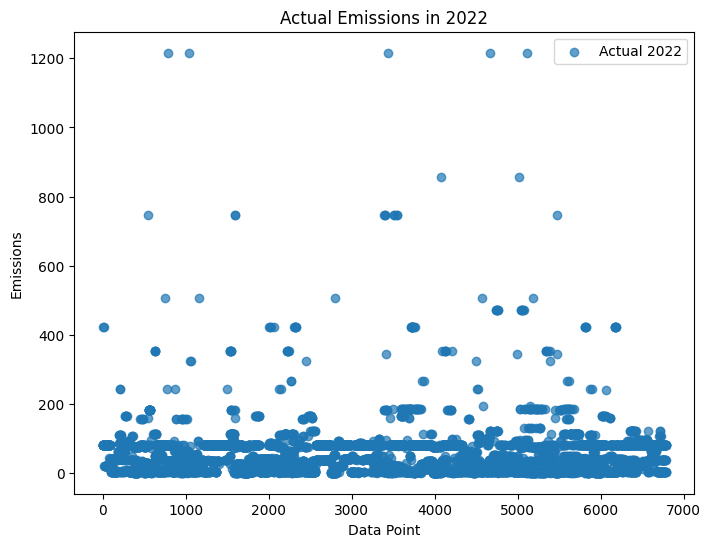

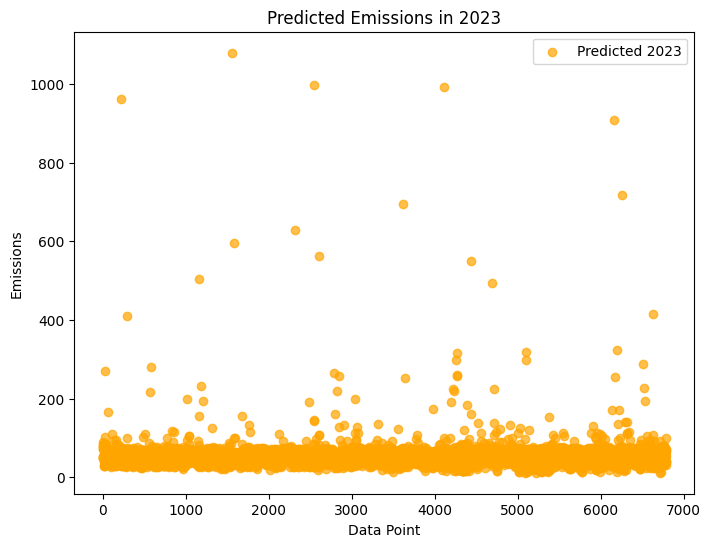

In [59]:
# Making two different  scatter plot for releases in 2022 and another scatter plot for 2023 predicted

import matplotlib.pyplot as plt

# Create the scatter plot for actual 2022 releases
plt.figure(figsize=(8, 6))
plt.scatter(range(len(comparison_df)), comparison_df['Actual Emissions for 2022'], label='Actual 2022', alpha=0.7)
plt.xlabel("Data Point")
plt.ylabel("Emissions")
plt.title("Actual Emissions in 2022")
plt.legend()
plt.show()

# Create the scatter plot for predicted 2023 releases
plt.figure(figsize=(8, 6))
plt.scatter(range(len(comparison_df)), comparison_df['Predicted Emissions for 2023 (Oil Price: 621.92)'], label='Predicted 2023', alpha=0.7, color='orange')
plt.xlabel("Data Point")
plt.ylabel("Emissions")
plt.title("Predicted Emissions in 2023")
plt.legend()
plt.show()

##Predicting release amount for 10% increase in oil price and 10% decrease in oil price.##

In [60]:
# Copy X for high and low price scenarios for 2023 predictions
X_2023_high_price = X.copy()
X_2023_high_price['Average amount for oil price'] *= 1.1  # Increase by 10%

X_2023_low_price = X.copy()
X_2023_low_price['Average amount for oil price'] *= 0.9  # Decrease by 10%

# Predict emissions for 2023 under these scenarios
try:
    y_2023_pred_high = best_rfr.predict(X_2023_high_price)
    y_2023_pred_low = best_rfr.predict(X_2023_low_price)

    print("Predicted emissions for 2023 with high oil prices:", y_2023_pred_high)
    print("Predicted emissions for 2023 with low oil prices:", y_2023_pred_low)
except Exception as e:
    print("Error during prediction:", e)


Predicted emissions for 2023 with high oil prices: [53.67782596 68.05832287 73.22081404 ... 53.10059943 63.21625217
 41.6023473 ]
Predicted emissions for 2023 with low oil prices: [53.43234838 69.85374411 74.10271348 ... 53.10059943 63.21625217
 41.6023473 ]


In [61]:
# Making a comparison between 2022 release and 2023 predicted, with increase by 10% or decrease by 10%

# Create DataFrames for 2023 predictions with high and low prices
predictions_2023_high_df = pd.DataFrame({
    'Predicted Emissions for 2023 (High Oil Price)': y_2023_pred_high
})

predictions_2023_low_df = pd.DataFrame({
    'Predicted Emissions for 2023 (Low Oil Price)': y_2023_pred_low
})

# Combine all data into a single comparison DataFrame
comparison_df = pd.concat([
    actual_2022_df.reset_index(drop=True),
    predictions_2023_df.reset_index(drop=True),
    predictions_2023_high_df.reset_index(drop=True),
    predictions_2023_low_df.reset_index(drop=True)
], axis=1)

# Display the comparison table
print("Comparison of Actual 2022 and Predicted 2023 Emissions:")
print(comparison_df)

# Calculate percentage changes
comparison_df['Percentage Change (High)'] = ((comparison_df['Predicted Emissions for 2023 (High Oil Price)'] - comparison_df['Actual Emissions for 2022']) / comparison_df['Actual Emissions for 2022']) * 100
comparison_df['Percentage Change (Low)'] = ((comparison_df['Predicted Emissions for 2023 (Low Oil Price)'] - comparison_df['Actual Emissions for 2022']) / comparison_df['Actual Emissions for 2022']) * 100

# Display the comparison table with percentage changes
print("\nComparison with Percentage Changes:")
comparison_df

Comparison of Actual 2022 and Predicted 2023 Emissions:
      Actual Emissions for 2022  \
0                      82.54003   
1                      82.54003   
2                      82.54003   
3                      82.54003   
4                      82.54003   
...                         ...   
6787                    2.15186   
6788                   82.54003   
6789                   82.54003   
6790                    2.15186   
6791                    2.51550   

      Predicted Emissions for 2023 (Oil Price: 621.92)  \
0                                            49.807017   
1                                            72.450837   
2                                            84.527545   
3                                            89.375736   
4                                            77.879485   
...                                                ...   
6787                                         69.341820   
6788                                         70.485634   
6

,Actual Emissions for 2022,Predicted Emissions for 2023 (Oil Price: 621.92),Predicted Emissions for 2023 (High Oil Price),Predicted Emissions for 2023 (Low Oil Price),Percentage Change (High),Percentage Change (Low)
0,82.54003,49.807017,53.677826,53.432348,-34.967523,-35.264927
1,82.54003,72.450837,68.058323,69.853744,-17.545071,-15.369859
2,82.54003,84.527545,73.220814,74.102713,-11.290541,-10.222090
3,82.54003,89.375736,99.096803,94.260269,20.059082,14.199461
4,82.54003,77.879485,69.510449,72.359420,-15.785772,-12.334149
...,...,...,...,...,...,...
6787,2.15186,69.341820,69.341820,69.341820,3122.413160,3122.413160
6788,82.54003,70.485634,70.485634,70.485634,-14.604303,-14.604303
6789,82.54003,53.100599,53.100599,53.100599,-35.666852,-35.666852
6790,2.15186,63.216252,63.216252,63.216252,2837.749304,2837.749304


In [62]:
pivot_table.shape

(6792, 11)

##Nitrogen oxide##

In [63]:
df_extracted_nitrogen = df_NAICS_211110[df_NAICS_211110['CAS_Number'] == '11104-93-1']
# Displaying the extracted data
df_extracted_nitrogen.head()

,Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Release to Air - Spills,Stack_Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
492701,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Fairview,55.99857,...,NaN,222.0300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493169,2017,407,0.0,Tidewater Midstream and Infrastructure Ltd.,Ram River,211110,Oil and gas extraction (except oil sands),AB,Rocky Mountain House,52.14630,...,NaN,202.4720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493187,2017,409,350.0,Husky Oil Operations Limited,Lloydminster Upgrader,211110,Oil and gas extraction (except oil sands),SK,Lloydminster,53.26311,...,NaN,874.8390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493216,2017,426,15.0,Pengrowth Energy Corporation,Quirk Creek Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Millarville,50.74770,...,NaN,267.8910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493230,2017,428,75.0,Imperial Oil Resources N.W.T. Limited,Norman Wells Central Processing Facility,211110,Oil and gas extraction (except oil sands),NT,Norman Wells,65.28730,...,NaN,97.3818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merging the oil price into nitrogen oxide dataframe for each year.

In [64]:
# Adding a new column in the data set for merging the values of the average amount of oil price
if 'Average amount for oil price' not in df.columns:
  df['Average amount for oil price'] = float('nan')

df['Average amount for oil price'] = df['Year'].eq(df['Average amount for oil price'].shift())

In [65]:
df_extracted_nitrogen.loc[df_extracted_nitrogen['Year'] == 2017, 'Average amount for oil price'] = 393.0833

<ipython-input-65-66d83e8610b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted_nitrogen.loc[df_extracted_nitrogen['Year'] == 2017, 'Average amount for oil price'] = 393.0833


In [66]:
df_extracted_nitrogen.loc[df_extracted_nitrogen['Year'] == 2018, 'Average amount for oil price'] = 474.4444

In [67]:
df_extracted_nitrogen.loc[df_extracted_nitrogen['Year'] == 2019, 'Average amount for oil price'] = 457.6667

In [68]:
df_extracted_nitrogen.loc[df_extracted_nitrogen['Year'] == 2020, 'Average amount for oil price'] = 304.7778

In [69]:
df_extracted_nitrogen.loc[df_extracted_nitrogen['Year'] == 2021, 'Average amount for oil price'] = 504.0881

In [70]:
df_extracted_nitrogen.loc[df_extracted_nitrogen['Year'] == 2022, 'Average amount for oil price'] = 732.6331

In [71]:
# Displaying the data
df_extracted_nitrogen.head()

,Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Stack_Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne),Average amount for oil price
492701,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Fairview,55.99857,...,222.0300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0833
493169,2017,407,0.0,Tidewater Midstream and Infrastructure Ltd.,Ram River,211110,Oil and gas extraction (except oil sands),AB,Rocky Mountain House,52.14630,...,202.4720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0833
493187,2017,409,350.0,Husky Oil Operations Limited,Lloydminster Upgrader,211110,Oil and gas extraction (except oil sands),SK,Lloydminster,53.26311,...,874.8390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0833
493216,2017,426,15.0,Pengrowth Energy Corporation,Quirk Creek Gas Plant,211110,Oil and gas extraction (except oil sands),AB,Millarville,50.74770,...,267.8910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0833
493230,2017,428,75.0,Imperial Oil Resources N.W.T. Limited,Norman Wells Central Processing Facility,211110,Oil and gas extraction (except oil sands),NT,Norman Wells,65.28730,...,97.3818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.0833


## Dropping the unnecessary columns as these columns contain very sparse data which is not useful for our problem, as we were unable to get sufficient data from these columns for our problem.

In [72]:
df_extracted_nitrogen.drop(
    [

        'Release to Air - Fugitive',
        'Release to Air - Other Non-Point ',
        'Release to Air - Storage / Handling ',
        'Release to Air - Spills ',
        'Releases to Water Bodies - Direct Discharges ',
        'Releases to Land - Leaks',
        'Release to Air - Road dust  ',
        'Releases to Land - Other ',
        'Releases to Land - Spills ',
        'Releases to Water Bodies - Leaks',
        'Releases to Water Bodies - Spills ',
        'Sum of release to all media (<1tonne)',
        'City'
    ],
    axis=1,
    inplace=True,
)

<ipython-input-72-227bd9d9115d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted_nitrogen.drop(


In [73]:
# Displaying the dataset
df_extracted_nitrogen.head()

,Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,Latitude,Longitude,CAS_Number,Substance_Name,Units,Estimation_Method,Stack_Point,Average amount for oil price
492701,2017,106,36.0,Canadian Natural Resources Limited,Dunvegan Sour Gas Plant,211110,Oil and gas extraction (except oil sands),AB,55.99857,-118.52980,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,222.0300,393.0833
493169,2017,407,0.0,Tidewater Midstream and Infrastructure Ltd.,Ram River,211110,Oil and gas extraction (except oil sands),AB,52.14630,-115.33000,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E1 - Site Specific Emission Factors,202.4720,393.0833
493187,2017,409,350.0,Husky Oil Operations Limited,Lloydminster Upgrader,211110,Oil and gas extraction (except oil sands),SK,53.26311,-109.94889,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,874.8390,393.0833
493216,2017,426,15.0,Pengrowth Energy Corporation,Quirk Creek Gas Plant,211110,Oil and gas extraction (except oil sands),AB,50.74770,-114.49470,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,267.8910,393.0833
493230,2017,428,75.0,Imperial Oil Resources N.W.T. Limited,Norman Wells Central Processing Facility,211110,Oil and gas extraction (except oil sands),NT,65.28730,-126.88120,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,97.3818,393.0833


In [74]:
# Getting the shape of the dataset
df_extracted_nitrogen.shape

(14419, 16)

## Calculating the mean number of employees so that we can deal with missing values in this column.

In [75]:
# Converting 'Number of employees' to numeric and replacing non-numeric with NaN
df_extracted_nitrogen['Number of employees'] = pd.to_numeric(df_extracted_nitrogen['Number of employees'], errors='coerce')

# Calculating the mean excluding NaN values
mean_employees = int(round(df_extracted_nitrogen['Number of employees'].mean(skipna=True)))

# Replacing NaN values and original 0 values with the mean
df_extracted_nitrogen['Number of employees'] = df_extracted_nitrogen['Number of employees'].fillna(mean_employees)
df_extracted_nitrogen['Number of employees'] = df_extracted_nitrogen['Number of employees'].replace(0, mean_employees)

# Checking if the mean calculation includes original 0 values
print(f"Mean number of employees: {mean_employees}")

Mean number of employees: 4


<ipython-input-75-1c34b179e829>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted_nitrogen['Number of employees'] = pd.to_numeric(df_extracted_nitrogen['Number of employees'], errors='coerce')
<ipython-input-75-1c34b179e829>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted_nitrogen['Number of employees'] = df_extracted_nitrogen['Number of employees'].fillna(mean_employees)
<ipython-input-75-1c34b179e829>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [76]:
# Checking the missing values
df_extracted_nitrogen.isnull().sum()

,0
Year,0
NPRI_ID,0
Number of employees,0
Company_Name,0
Facility_Name,0
NAICS / Code_SCIAN,0
NAICS Title / Titre Code_SCIAN,0
PROVINCE,0
Latitude,10
Longitude,10


**Cause for reduction in number of rows**

df_extracted_nitrogen contains all individual records of nitrogen oxide releases for companies with NAICS code 211110. Each row represents a single report for a specific company, facility, and year.

pivot_table_complete is created by grouping the data in df_extracted_nitrogen by 'Company_Name', 'NPRI_ID', and 'Year' and then calculating the sum of 'Release to Air - Stack / Point' for each group. This aggregation process combines multiple rows from df_extracted_nitrogen into a single row in pivot_table_complete if they have the same 'Company_Name', 'NPRI_ID', and 'Year'. This will naturally reduce the number of rows

In [77]:
# Grouping by specified columns and sum the 'Release to Air - Stack / Point' column
df_nitrogen = df_extracted_nitrogen.groupby(['Year', 'Company_Name', 'NPRI_ID', 'PROVINCE', 'Facility_Name','Number of employees', 'Latitude', 'Longitude', 'CAS_Number', 'Substance_Name', 'Estimation_Method', 'Average amount for oil price', 'Units', 'NAICS / Code_SCIAN', 'NAICS Title / Titre Code_SCIAN'])['Stack_Point'].sum().reset_index()

# Displaying the resulting DataFrame
df_nitrogen.head()

,Year,Company_Name,NPRI_ID,PROVINCE,Facility_Name,Number of employees,Latitude,Longitude,CAS_Number,Substance_Name,Estimation_Method,Average amount for oil price,Units,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,Stack_Point
0,2017,AECO Gas Storage Partnership,6619,AB,Suffield Gas Storage Facility,22.0,50.5772,-111.1781,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),E2 - Published Emission Factors,393.0833,tonnes,211110,Oil and gas extraction (except oil sands),142.583
1,2017,ARC Resources,438,AB,Redwater Sour Gas Plant 01-29,27.0,53.9527,-113.0780,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),E2 - Published Emission Factors,393.0833,tonnes,211110,Oil and gas extraction (except oil sands),116.790
2,2017,ARC Resources,15131,AB,Ante Creek North Sour Gas Plant 02-26,1.0,54.8972,-117.7088,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),E2 - Published Emission Factors,393.0833,tonnes,211110,Oil and gas extraction (except oil sands),198.103
3,2017,ARC Resources,15412,AB,Hotchkiss Comp Stn 07-03,1.0,57.2990,-118.2289,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),E2 - Published Emission Factors,393.0833,tonnes,211110,Oil and gas extraction (except oil sands),129.787
4,2017,ARC Resources,15414,AB,Ante Creek North Oil Battery 07-18,1.0,54.7964,-117.6580,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),E2 - Published Emission Factors,393.0833,tonnes,211110,Oil and gas extraction (except oil sands),21.870


In [78]:
# Getting the shape of the dataframe
df_nitrogen.shape

(14409, 16)

##Feature Engineering: Creating new features Release_t-1, Release_t-2, Release_t-3, these features help to record the previous year values of the same comapny and helps the model to learn properly about that particular compaany.##

In [79]:
pivot_table = pd.pivot_table(df_nitrogen,
                             values='Stack_Point',
                             index=["Company_Name", 'Facility_Name', 'NPRI_ID', 'Year', 'Number of employees', 'Average amount for oil price'],
                             aggfunc='sum')

# Reseting the index to make 'Company_Name', 'NPRI_ID', and 'Year' columns
pivot_table = pivot_table.reset_index()

# Creating lag columns for t-1, t-2, and t-3 within each group of 'Company_Name' and 'Facility_Name'
for i in range(1, 4):
    pivot_table[f'Release_t-{i}'] = pivot_table.groupby(["Company_Name", 'Facility_Name'])['Stack_Point'].shift(i)

pivot_table.head(5)

,Company_Name,Facility_Name,NPRI_ID,Year,Number of employees,Average amount for oil price,Stack_Point,Release_t-1,Release_t-2,Release_t-3
0,ACCEL Energy Canada Ltd.,JCWP 7-6,23628,2020,1.0,304.7778,57.566,NaN,NaN,NaN
1,ACCEL Energy Canada Ltd.,Judy Creek Production Complex,4566,2020,12.0,304.7778,2.718,NaN,NaN,NaN
2,ACCEL Energy Canada Ltd.,South Swan Hills,17445,2020,1.0,304.7778,53.604,NaN,NaN,NaN
3,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2017,22.0,393.0833,142.583,NaN,NaN,NaN
4,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2018,21.0,474.4444,76.654,142.583,NaN,NaN


##Adding feature "Release_2022" which is the recent year relese value for a company and helps the mdoel to know the recent year release amount for that comapny.##

In [80]:
# Creating a pivot table
pivot_table = pd.pivot_table(df_nitrogen,
                           values='Stack_Point',
                           index=["Company_Name","Facility_Name", 'NPRI_ID', "Year","Number of employees","Average amount for oil price"],
                           aggfunc='sum')

# Reseting the index to make 'Company_Name', 'NPRI_ID', and 'Year' columns
pivot_table = pivot_table.reset_index()

# Creating lag columns for t-1, t-2, and t-3 within each 'Company_Name' and 'Facility_Name'
for i in range(1, 4):
    pivot_table[f'Release_t-{i}'] = pivot_table.groupby(["Company_Name", "Facility_Name"])['Stack_Point'].shift(i)


# Creating a column for release in 2022
pivot_table['Release_2022'] = pivot_table.apply(lambda row: pivot_table[(pivot_table["Company_Name"] == row["Company_Name"]) & (pivot_table["Year"] == 2022)]['Stack_Point'].iloc[0] if (2022 in pivot_table[pivot_table["Company_Name"] == row["Company_Name"]]["Year"].values) else None, axis=1)


pivot_table.head()

,Company_Name,Facility_Name,NPRI_ID,Year,Number of employees,Average amount for oil price,Stack_Point,Release_t-1,Release_t-2,Release_t-3,Release_2022
0,ACCEL Energy Canada Ltd.,JCWP 7-6,23628,2020,1.0,304.7778,57.566,NaN,NaN,NaN,NaN
1,ACCEL Energy Canada Ltd.,Judy Creek Production Complex,4566,2020,12.0,304.7778,2.718,NaN,NaN,NaN,NaN
2,ACCEL Energy Canada Ltd.,South Swan Hills,17445,2020,1.0,304.7778,53.604,NaN,NaN,NaN,NaN
3,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2017,22.0,393.0833,142.583,NaN,NaN,NaN,87.99343
4,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2018,21.0,474.4444,76.654,142.583,NaN,NaN,87.99343


In [81]:
# Sorting the pivot_table by 'Year' and reset the index
pivot_table = pivot_table.sort_values(by='Year').reset_index(drop=True)
pivot_table.head()

,Company_Name,Facility_Name,NPRI_ID,Year,Number of employees,Average amount for oil price,Stack_Point,Release_t-1,Release_t-2,Release_t-3,Release_2022
0,Canadian Natural Resources Limited,Richmound Compressor Station 13-32-017-28W3,29270,2017,1.0,393.0833,125.3770,NaN,NaN,NaN,53.38059
1,RMP Energy Inc.,Elmworth 2-23 Bty,29892,2017,2.0,393.0833,39.6570,NaN,NaN,NaN,NaN
2,Tidewater Midstream and Infrastructure Ltd.,02-19 Compressor,17589,2017,1.0,393.0833,37.3842,NaN,NaN,NaN,34.80910
3,Progress Energy Canada Ltd.,W Gundy B-032-B/094-B-16,27858,2017,1.0,393.0833,44.3380,NaN,NaN,NaN,NaN
4,Tourmaline Oil Corp,Obed 01-21,21388,2017,1.0,393.0833,214.5938,NaN,NaN,NaN,62.44490


##We are making sure whether the lag is working properly or not by taking example of a company 'AECO Gas Storage Partnership'. First the data is taken from df_extracted_nitrogen where lags were not created and then the data is taken from pivot_table which displays data after creating lags##

In [82]:
# Displaying data for 'AECO Gas Storage Partnership'
aeco_data = df_extracted_nitrogen[df_extracted_nitrogen['Company_Name'] == 'AECO Gas Storage Partnership']
aeco_data

,Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,Latitude,Longitude,CAS_Number,Substance_Name,Units,Estimation_Method,Stack_Point,Average amount for oil price
506020,2017,6619,22.0,AECO Gas Storage Partnership,Suffield Gas Storage Facility,211110,Oil and gas extraction (except oil sands),AB,50.5772,-111.1781,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,142.58300,393.0833
536410,2018,6619,21.0,AECO Gas Storage Partnership,Suffield Gas Storage Facility,211110,Oil and gas extraction (except oil sands),AB,50.5772,-111.1781,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,76.65400,474.4444
581065,2019,6619,21.0,AECO Gas Storage Partnership,Suffield Gas Storage Facility,211110,Oil and gas extraction (except oil sands),AB,50.5772,-111.1781,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,76.78900,457.6667
624971,2020,6619,21.0,AECO Gas Storage Partnership,Suffield Gas Storage Facility,211110,Oil and gas extraction (except oil sands),AB,50.5772,-111.1781,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,225.94400,304.7778
666449,2021,6619,21.0,AECO Gas Storage Partnership,Suffield Gas Storage Facility,211110,Oil and gas extraction (except oil sands),AB,50.5772,-111.1781,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,104.31400,504.0881
707537,2022,6619,22.0,AECO Gas Storage Partnership,Suffield Gas Storage Facility,211110,Oil and gas extraction (except oil sands),AB,50.5772,-111.1781,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,E2 - Published Emission Factors,87.99343,732.6331


In [83]:
# Filtering the pivot_table for "AECO Gas Storage Partnership"
aeco_data = pivot_table[pivot_table["Company_Name"] == "AECO Gas Storage Partnership"]

# Displaying the filtered data
aeco_data

,Company_Name,Facility_Name,NPRI_ID,Year,Number of employees,Average amount for oil price,Stack_Point,Release_t-1,Release_t-2,Release_t-3,Release_2022
1570,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2017,22.0,393.0833,142.58300,NaN,NaN,NaN,87.99343
4426,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2018,21.0,474.4444,76.65400,142.583,NaN,NaN,87.99343
4793,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2019,21.0,457.6667,76.78900,76.654,142.583,NaN,87.99343
8231,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2020,21.0,304.7778,225.94400,76.789,76.654,142.583,87.99343
11215,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2021,21.0,504.0881,104.31400,225.944,76.789,76.654,87.99343
12285,AECO Gas Storage Partnership,Suffield Gas Storage Facility,6619,2022,22.0,732.6331,87.99343,104.314,225.944,76.789,87.99343


In [84]:
# Getting the shape of the pivot table
pivot_table.shape

(14340, 11)

In [85]:
# Droping rows with NaN values in the 'Release_2022' column
pivot_table.dropna(subset=['Release_2022'], inplace=True)

In [86]:
# Getting the shape of the pivot table
pivot_table.shape

(12290, 11)

In [87]:
# Droping rows where all three specified columns ('Release_t-1', 'Release_t-2', 'Release_t-3') are NaN
pivot_table.dropna(subset=['Release_t-1', 'Release_t-2', 'Release_t-3'], how='all', inplace=True)

Sorting the values by "Year" column to ensure time-series is maintained and there is no data leakage.

In [88]:
# Sorting the pivot table in ascending order based on the year
pivot_table_sorted = pivot_table.sort_values(by='Year', ascending=True).reset_index(drop=True)
pivot_table_sorted.head(5)

,Company_Name,Facility_Name,NPRI_ID,Year,Number of employees,Average amount for oil price,Stack_Point,Release_t-1,Release_t-2,Release_t-3,Release_2022
0,Canadian Natural Resources Limited,Frog Lake Compressor Station 07-36-057-04W4,25465,2017,1.0,393.0833,74.205,62.985000,NaN,NaN,53.38059
1,Taqa North Ltd.,PRIMEWEST LONE PINE CREEK,17741,2017,1.0,393.0833,56.388,158.494848,165.33,NaN,0.39280
2,Canadian Natural Resources Limited,Tarragon Twinning North Sweet Gas Plant 04-31-...,28332,2017,1.0,393.0833,62.895,45.923000,NaN,NaN,53.38059
3,Canadian Natural Resources Limited,Brightview Hoadley Compressor Station 14-02-04...,16007,2018,1.0,474.4444,77.941,81.623000,NaN,NaN,53.38059
4,Canadian Natural Resources Limited,Brascan Compressor Station 11-17-097-06W6,26082,2018,1.0,474.4444,32.833,30.128000,NaN,NaN,53.38059


In [89]:
# Getting the shape of the sorted pivot table
pivot_table_sorted.shape

(7147, 11)

In [90]:
# Droping the specified columns from the pivot table
pivot_table_sorted = pivot_table_sorted.drop(['Company_Name','Facility_Name', 'Stack_Point'], axis=1, errors='ignore')
pivot_table_sorted.head(5)

,NPRI_ID,Year,Number of employees,Average amount for oil price,Release_t-1,Release_t-2,Release_t-3,Release_2022
0,25465,2017,1.0,393.0833,62.985000,NaN,NaN,53.38059
1,17741,2017,1.0,393.0833,158.494848,165.33,NaN,0.39280
2,28332,2017,1.0,393.0833,45.923000,NaN,NaN,53.38059
3,16007,2018,1.0,474.4444,81.623000,NaN,NaN,53.38059
4,26082,2018,1.0,474.4444,30.128000,NaN,NaN,53.38059


In [91]:
# Importing the libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Defining features (X) and target (y)
X = pivot_table_sorted.drop(columns=['Release_2022'])  # Droping the target column
y = pivot_table_sorted['Release_2022']  # Target: Release in 2022

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle= False)

##We used four different models: ##
DecisionTreeRegressor, KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor. But KNeighborsRegressor, GradientBoostingRegressor were giving us errors as there were Nan values in Release_t-2 and Release_t-3 columns, so we deleted the code for using these two models.

Then we evaluated DecisionTreeRegressor and RandomForestRegressor as these are able to handle missing values.

In [92]:
# Importing the libraries for different models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
# Implementing Decision Tree Regression
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implementing Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [94]:
# Evaluating the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")

##Reason for choosing RandomForestRegressor model##
1. MSE: Lower the value for Mean Squared Error (MSE) better is the performance of the model. When we compare Decision Tree and Random Forest, Random Forest has a lower MSE value which suggests predictions made by Random Forest are more accurate for giving predictions.

2. R^2: R-squared represents proportion of variance in target variable which is explained by the model. Higher the value for R^2 represents a better fit for the model. When we compare Decision Tree and Random Forest, Random Forest has a higher value which means that Random Forest explains a larger proportion of variability in target variable.

In [95]:
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")

Decision Tree - Mean Squared Error: 11463.77844336336
Decision Tree - R-squared (R²): -0.03957706314542064

Random Forest - Mean Squared Error: 6064.8175645932515
Random Forest - R-squared (R²): 0.45002031717015323



In [96]:
# Importing the libraries for the Random Tree Regressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Initializing the RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

# Using parameter distribution
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt'],
}

# Using RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Fitting the model
random_search.fit(X_train, y_train)

# Getting the best parameters and estimator
best_params = random_search.best_params_
best_rfr = random_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 57}


In [97]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y_pred = best_rfr.predict(X_test)

# Calculate and print R2 Score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Calculate and print other regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


R^2 Score: 0.39222143730296033
Mean Squared Error (MSE): 6702.185948873762
Mean Absolute Error (MAE): 36.26759524399412


In [98]:
# Train the RandomForestRegressor with the best parameters
best_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=57,
                      random_state=42)

Adding the value for "Average amount for oil price" for predciting the release amount for 2023.

In [99]:
# Copy X structure to create 2023 data
X_2023 = X.copy()

# Set the 'Average amount for oil price' to 621.92 for the 2023 scenario
X_2023['Average amount for oil price'] = 621.92

# Predict emissions for 2023 based on this price
y_2023_pred = best_rfr.predict(X_2023)

# Display the predicted emissions
print("Predicted emissions for 2023 with an oil price of 621.92:", y_2023_pred)

Predicted emissions for 2023 with an oil price of 621.92: [48.95773113 61.27032872 45.58623396 ... 31.73479209 45.264169
 46.85745857]


In [100]:
import pandas as pd

# Convert the 2023 predictions into a DataFrame
predictions_2023_df = pd.DataFrame({
    'Predicted Emissions for 2023 (Oil Price: 621.92)': y_2023_pred
})

# Display the table
print("Predicted Emissions for 2023 with an oil price of 621.92:")
print(predictions_2023_df)

Predicted Emissions for 2023 with an oil price of 621.92:
      Predicted Emissions for 2023 (Oil Price: 621.92)
0                                            48.957731
1                                            61.270329
2                                            45.586234
3                                            47.638647
4                                            45.586234
...                                                ...
7142                                         27.737596
7143                                         28.777609
7144                                         31.734792
7145                                         45.264169
7146                                         46.857459

[7147 rows x 1 columns]


In [101]:
# Create a DataFrame for 2022 actual values
actual_2022_df = pd.DataFrame({
    'Actual Emissions for 2022': pivot_table['Release_2022']
})

# Assuming you have already predicted emissions for 2023 (y_2023_pred)
predictions_2023_df = pd.DataFrame({
    'Predicted Emissions for 2023 (Oil Price: 621.92)': y_2023_pred
})


# Combine the actual 2022 and predicted 2023 data
comparison_df = pd.concat([actual_2022_df.reset_index(drop=True), predictions_2023_df.reset_index(drop=True)], axis=1)

# Display the comparison table
print("Comparison of Actual 2022 and Predicted 2023 Emissions:")
print(comparison_df)


# Calculate the percentage change
comparison_df['Percentage Change'] = ((comparison_df['Predicted Emissions for 2023 (Oil Price: 621.92)'] - comparison_df['Actual Emissions for 2022']) / comparison_df['Actual Emissions for 2022']) * 100

# Display the comparison table with percentage change
print("\nComparison with Percentage Change:")
comparison_df

Comparison of Actual 2022 and Predicted 2023 Emissions:
      Actual Emissions for 2022  \
0                      53.38059   
1                       0.39280   
2                      53.38059   
3                      25.64342   
4                      25.64342   
...                         ...   
7142                    0.90200   
7143                   24.16983   
7144                   24.16983   
7145                    0.90200   
7146                    0.95700   

      Predicted Emissions for 2023 (Oil Price: 621.92)  
0                                            48.957731  
1                                            61.270329  
2                                            45.586234  
3                                            47.638647  
4                                            45.586234  
...                                                ...  
7142                                         27.737596  
7143                                         28.777609  
7144      

,Actual Emissions for 2022,Predicted Emissions for 2023 (Oil Price: 621.92),Percentage Change
0,53.38059,48.957731,-8.285519
1,0.39280,61.270329,15498.352525
2,53.38059,45.586234,-14.601480
3,25.64342,47.638647,85.773375
4,25.64342,45.586234,77.769712
...,...,...,...
7142,0.90200,27.737596,2975.121473
7143,24.16983,28.777609,19.064175
7144,24.16983,31.734792,31.299194
7145,0.90200,45.264169,4918.200554


In [102]:
# Checking how many companies show decrease in release qand how many increase

import pandas as pd

# Count companies with decreased release
decrease_count = comparison_df[comparison_df['Percentage Change'] < 0].shape[0]
decrease_indices = comparison_df[comparison_df['Percentage Change'] < 0].index.tolist()


# Count companies with increased release
increase_count = comparison_df[comparison_df['Percentage Change'] > 0].shape[0]
increase_indices = comparison_df[comparison_df['Percentage Change'] > 0].index.tolist()

print(f"Number of companies with decreased release: {decrease_count}")
print(f"Indices of companies with decreased release: {decrease_indices}")
print(f"Number of companies with increased release: {increase_count}")
print(f"Indices of companies with increased release: {increase_indices}")

Number of companies with decreased release: 2852
Indices of companies with decreased release: [0, 2, 7, 14, 16, 21, 23, 26, 27, 30, 31, 33, 36, 37, 38, 45, 49, 59, 66, 71, 105, 108, 109, 112, 113, 116, 117, 119, 120, 121, 126, 128, 131, 133, 136, 138, 140, 142, 145, 146, 147, 148, 152, 153, 155, 161, 163, 169, 170, 177, 182, 184, 194, 203, 205, 208, 209, 212, 216, 219, 227, 231, 262, 283, 295, 296, 311, 312, 317, 322, 336, 342, 345, 346, 347, 348, 349, 350, 351, 352, 354, 356, 357, 358, 367, 368, 369, 372, 374, 401, 410, 423, 467, 470, 473, 474, 475, 476, 477, 478, 479, 481, 490, 498, 499, 500, 504, 506, 507, 517, 520, 530, 531, 532, 533, 537, 538, 539, 541, 542, 543, 545, 547, 549, 552, 554, 555, 556, 557, 559, 560, 561, 562, 567, 570, 571, 575, 577, 583, 584, 588, 592, 594, 595, 596, 597, 598, 599, 602, 605, 609, 610, 611, 612, 613, 614, 617, 626, 633, 634, 636, 639, 641, 643, 645, 649, 651, 652, 653, 656, 657, 659, 663, 665, 669, 676, 679, 680, 681, 682, 684, 686, 690, 691, 694, 695

In [103]:
# Get the company names with increased indices using iloc from the original pivot_table
increased_companies = pivot_table.iloc[increase_indices][['Company_Name', 'Facility_Name']]
print("\nCompany names with an increase in release:")
print(increased_companies)


Company names with an increase in release:
                     Company_Name  \
627               Taqa North Ltd.   
1793          Cenovus Energy Inc.   
1797          Cenovus Energy Inc.   
1798          Cenovus Energy Inc.   
1799              Taqa North Ltd.   
...                           ...   
14321    Chevron Canada Resources   
14322  Tamarack Acquisition Corp.   
14323  Tamarack Acquisition Corp.   
14327    Chevron Canada Resources   
14339       i3 Energy Canada Ltd.   

                                        Facility_Name  
627                         PRIMEWEST LONE PINE CREEK  
1793                      Goodfare Comp Station 10-23  
1797                         Gilby Comp Station 06-25  
1798                       Garrington Sweet Gas Plant  
1799               Pembina Blue Rapids 04-08-047-09W5  
...                                               ...  
14321            Chevron 06-25-059-20W5 MultiWell Bat  
14322   Homeglen East Gathering System 06-29-043-01W5  
14323  

In [104]:
# Get the company names with increased indices using iloc from the original pivot_table
decreased_companies = pivot_table.iloc[decrease_indices][['Company_Name', 'Facility_Name']]
print("\nCompany names with an decrease in release:")
print(decreased_companies)


Company names with an decrease in release:
                             Company_Name  \
507    Canadian Natural Resources Limited   
1067   Canadian Natural Resources Limited   
1804                  NuVista Energy Ltd.   
1817   Canadian Natural Resources Limited   
1824   Canadian Natural Resources Limited   
...                                   ...   
14294             Certus Oil and Gas Inc.   
14303             Certus Oil and Gas Inc.   
14305             Certus Oil and Gas Inc.   
14310          Tamarack Acquisition Corp.   
14311             Certus Oil and Gas Inc.   

                                           Facility_Name  
507          Frog Lake Compressor Station 07-36-057-04W4  
1067   Tarragon Twinning North Sweet Gas Plant 04-31-...  
1804                            Wapiti Gas Battery 08-10  
1817          Sexsmith Compressor Station 10-17-074-06W6  
1824      South Wapiti Compressor Station 10-01-068-09W6  
...                                                  ...  
14

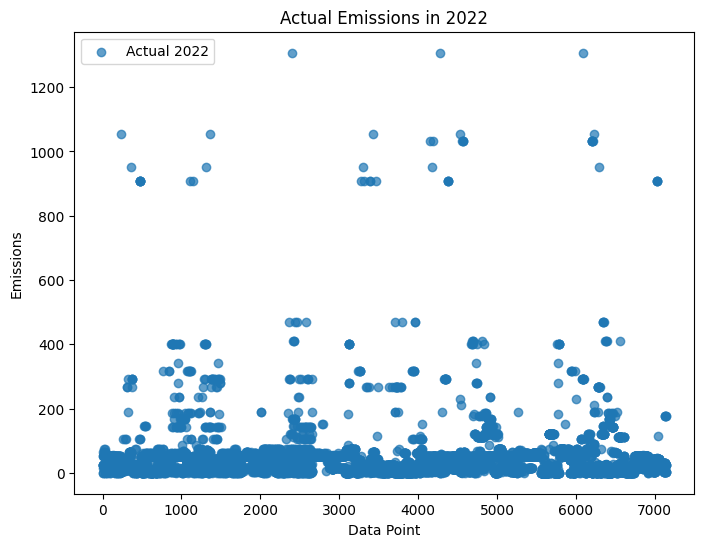

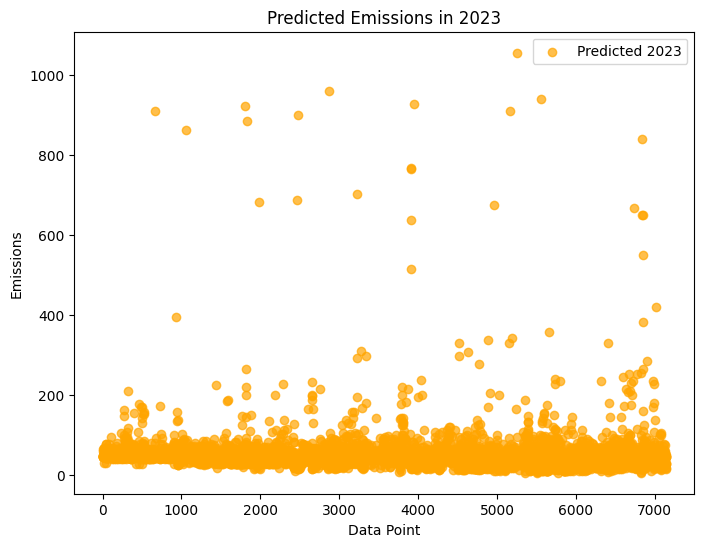

In [105]:
# Making two different  scatter plot for releases in 2022 and another scatter plot for 2023 predicted

import matplotlib.pyplot as plt

# Create the scatter plot for actual 2022 releases
plt.figure(figsize=(8, 6))
plt.scatter(range(len(comparison_df)), comparison_df['Actual Emissions for 2022'], label='Actual 2022', alpha=0.7)
plt.xlabel("Data Point")
plt.ylabel("Emissions")
plt.title("Actual Emissions in 2022")
plt.legend()
plt.show()

# Create the scatter plot for predicted 2023 releases
plt.figure(figsize=(8, 6))
plt.scatter(range(len(comparison_df)), comparison_df['Predicted Emissions for 2023 (Oil Price: 621.92)'], label='Predicted 2023', alpha=0.7, color='orange')
plt.xlabel("Data Point")
plt.ylabel("Emissions")
plt.title("Predicted Emissions in 2023")
plt.legend()
plt.show()

Adding increase in oil price by 10% and decrease in oil price by 10% for observing the changes in releases amount.

In [106]:
# Copy X for high and low price scenarios for 2023 predictions
X_2023_high_price = X.copy()
X_2023_high_price['Average amount for oil price'] *= 1.1  # Increase by 10%

X_2023_low_price = X.copy()
X_2023_low_price['Average amount for oil price'] *= 0.9  # Decrease by 10%

# Predict emissions for 2023 under these scenarios
try:
    y_2023_pred_high = best_rfr.predict(X_2023_high_price)
    y_2023_pred_low = best_rfr.predict(X_2023_low_price)

    print("Predicted emissions for 2023 with high oil prices:", y_2023_pred_high)
    print("Predicted emissions for 2023 with low oil prices:", y_2023_pred_low)
except Exception as e:
    print("Error during prediction:", e)

Predicted emissions for 2023 with high oil prices: [47.23823165 42.33463014 44.68169727 ... 31.73479209 45.264169
 46.85745857]
Predicted emissions for 2023 with low oil prices: [47.19021376 41.24616833 44.63367939 ... 31.73479209 45.264169
 46.85745857]


In [107]:
# Making a comparison between 2022 release and 2023 predicted, with increase by 10% or decrease by 10%

# Create DataFrames for 2023 predictions with high and low prices
predictions_2023_high_df = pd.DataFrame({
    'Predicted Emissions for 2023 (High Oil Price)': y_2023_pred_high
})

predictions_2023_low_df = pd.DataFrame({
    'Predicted Emissions for 2023 (Low Oil Price)': y_2023_pred_low
})

# Combine all data into a single comparison DataFrame
comparison_df = pd.concat([
    actual_2022_df.reset_index(drop=True),
    predictions_2023_df.reset_index(drop=True),
    predictions_2023_high_df.reset_index(drop=True),
    predictions_2023_low_df.reset_index(drop=True)
], axis=1)

# Display the comparison table
print("Comparison of Actual 2022 and Predicted 2023 Emissions:")
print(comparison_df)

# Calculate percentage changes
comparison_df['Percentage Change (High)'] = ((comparison_df['Predicted Emissions for 2023 (High Oil Price)'] - comparison_df['Actual Emissions for 2022']) / comparison_df['Actual Emissions for 2022']) * 100
comparison_df['Percentage Change (Low)'] = ((comparison_df['Predicted Emissions for 2023 (Low Oil Price)'] - comparison_df['Actual Emissions for 2022']) / comparison_df['Actual Emissions for 2022']) * 100

# Display the comparison table with percentage changes
print("\nComparison with Percentage Changes:")
comparison_df

Comparison of Actual 2022 and Predicted 2023 Emissions:
      Actual Emissions for 2022  \
0                      53.38059   
1                       0.39280   
2                      53.38059   
3                      25.64342   
4                      25.64342   
...                         ...   
7142                    0.90200   
7143                   24.16983   
7144                   24.16983   
7145                    0.90200   
7146                    0.95700   

      Predicted Emissions for 2023 (Oil Price: 621.92)  \
0                                            48.957731   
1                                            61.270329   
2                                            45.586234   
3                                            47.638647   
4                                            45.586234   
...                                                ...   
7142                                         27.737596   
7143                                         28.777609   
7

,Actual Emissions for 2022,Predicted Emissions for 2023 (Oil Price: 621.92),Predicted Emissions for 2023 (High Oil Price),Predicted Emissions for 2023 (Low Oil Price),Percentage Change (High),Percentage Change (Low)
0,53.38059,48.957731,47.238232,47.190214,-11.506726,-11.596680
1,0.39280,61.270329,42.334630,41.246168,10677.655330,10400.552018
2,53.38059,45.586234,44.681697,44.633679,-16.295985,-16.385938
3,25.64342,47.638647,48.784661,47.695221,90.242415,85.993993
4,25.64342,45.586234,45.703123,44.810045,78.225538,74.742858
...,...,...,...,...,...,...
7142,0.90200,27.737596,27.737596,27.737596,2975.121473,2975.121473
7143,24.16983,28.777609,28.777609,28.777609,19.064175,19.064175
7144,24.16983,31.734792,31.734792,31.734792,31.299194,31.299194
7145,0.90200,45.264169,45.264169,45.264169,4918.200554,4918.200554
